In [164]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [165]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [166]:
# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

In [167]:
#define la ubicacion local
import os
print(os.getcwd())

C:\Users\Juan


In [168]:
#ubicar el archivo en la ruta anterior
dataset = pandas.read_csv("retail_sales.csv")

In [169]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,83.70
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,152.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,14.22
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,10.57
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,79.69


In [170]:
dataset.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [171]:
# Cantidad de filas y de columnas
dataset.shape

(537577, 12)

In [172]:
# Cantidad total de órdenes (COUNT)
dataset.User_ID.count()

537577

In [173]:
# Cantidad de usuarios (COUNT DISTINCT)
dataset.User_ID.nunique()

5891

In [174]:
# Cantidad de productos (COUNT DISTINCT)
dataset.Product_ID.nunique()

3623

In [175]:
compras_por_usuario = dataset.groupby('User_ID').User_ID.count()

In [176]:
print (compras_por_usuario)

User_ID
1000001     34
1000002     76
1000003     29
1000004     13
1000005    106
1000006     46
1000007     16
1000008     76
1000009     57
1000010    222
1000011     69
1000012     11
1000013     60
1000014     13
1000015    116
1000016     21
1000017    114
1000018    179
1000019    144
1000020     12
1000021     13
1000022    155
1000023    171
1000024     76
1000025     43
1000026    226
1000027     41
1000028     57
1000029     52
1000030     30
          ... 
1006011     99
1006012     15
1006013     72
1006014     54
1006015     32
1006016    469
1006017     15
1006018     76
1006019     44
1006020     23
1006021     64
1006022     24
1006023     77
1006024     55
1006025    142
1006026     42
1006027     22
1006028     26
1006029     14
1006030     53
1006031     30
1006032     51
1006033     35
1006034     11
1006035    143
1006036    476
1006037    116
1006038     10
1006039     67
1006040    169
Name: User_ID, Length: 5891, dtype: int64


In [177]:
#Se corrobora el correcto agrupamiento de compras por usuario
compras_por_usuario.sum()

537577

In [178]:
compras_por_usuario.describe()

count    5891.000000
mean       91.253947
std       105.929800
min         5.000000
25%        25.000000
50%        53.000000
75%       114.000000
max      1025.000000
Name: User_ID, dtype: float64

Text(0, 0.5, 'Densidad de probabilidad')

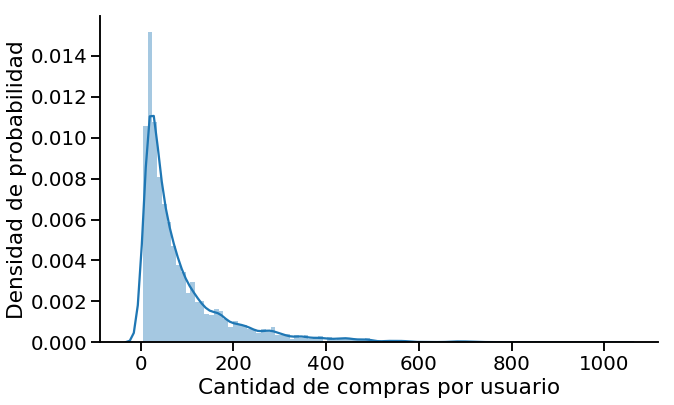

In [179]:
plt.figure(figsize=(10,6))
seaborn.distplot(compras_por_usuario, bins=100)
seaborn.despine()
plt.xlabel('Cantidad de compras por usuario')
plt.ylabel('Densidad de probabilidad')

#distribución exponencial. Muchos usuarios compran poco y pocos usuarios compran mucho.

In [180]:
dataset.Purchase.describe()

count    537577.000000
mean         93.338599
std          49.810221
min           1.850000
25%          58.660000
50%          80.620000
75%         120.730000
max         239.610000
Name: Purchase, dtype: float64

Text(0, 0.5, 'Densidad de probabilidad')

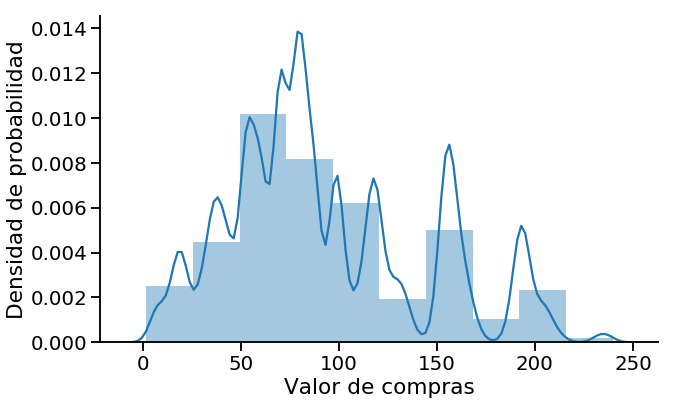

In [181]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset.Purchase, bins=10)
seaborn.despine()
plt.xlabel('Valor de compras')
plt.ylabel('Densidad de probabilidad')

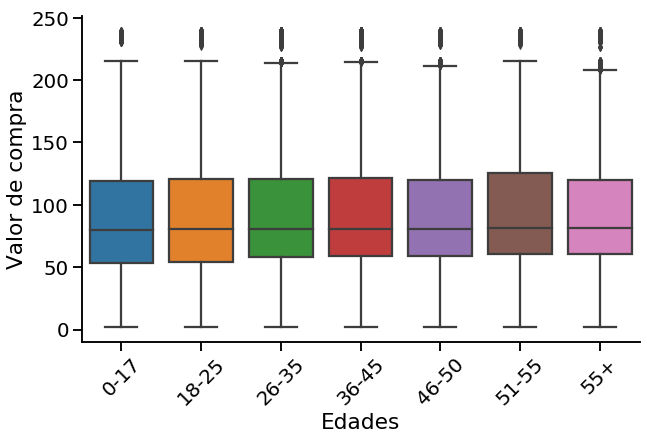

In [182]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data= dataset,
                x= 'Age',
                y= 'Purchase',
                order=['0-17', '18-25', '26-35','36-45', '46-50', '51-55', '55+'])

plt.ylabel('Valor de compra')
plt.xlabel('Edades')
plt.xticks(rotation=45)
seaborn.despine()


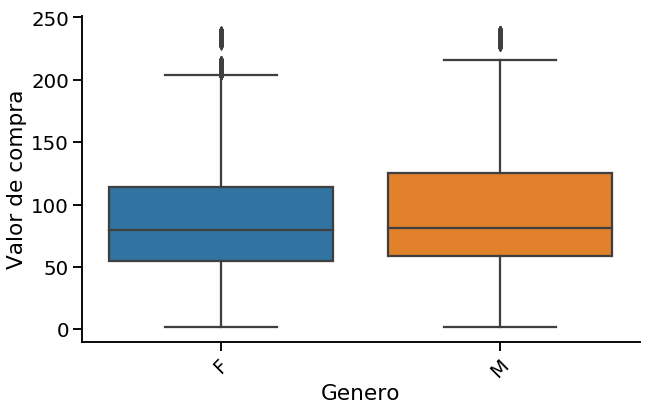

In [183]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data= dataset,
                x= 'Gender',
                y= 'Purchase')

plt.ylabel('Valor de compra')
plt.xlabel('Genero')
plt.xticks(rotation=45)
seaborn.despine()

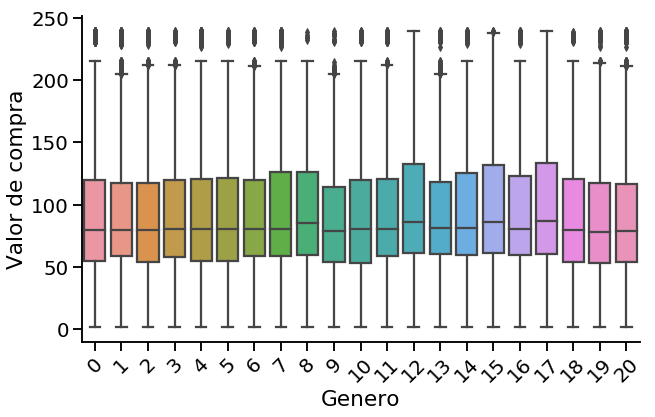

In [184]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data= dataset,
                x= 'Occupation',
                y= 'Purchase')

plt.ylabel('Valor de compra')
plt.xlabel('Genero')
plt.xticks(rotation=45)
seaborn.despine()

In [185]:
outliers_valor_compra= dataset[dataset.Purchase > 200]

In [186]:
outliers_valor_compra.shape[0]

12515

In [187]:
outliers_valor_compra_por_genero = outliers_valor_compra.groupby('Gender').Purchase.count()

In [188]:
print(outliers_valor_compra_por_genero)

Gender
F    2779
M    9736
Name: Purchase, dtype: int64


In [189]:
outliers_valor_compra_por_edad = outliers_valor_compra.groupby('Age').Purchase.count()

In [190]:
print(outliers_valor_compra_por_edad)

Age
0-17      306
18-25    2022
26-35    4924
36-45    2521
46-50    1025
51-55    1114
55+       603
Name: Purchase, dtype: int64


In [191]:
outliers_valor_compra_por_ocupacion = outliers_valor_compra.groupby('Occupation').Purchase.count()

In [192]:
print(outliers_valor_compra_por_ocupacion)

Occupation
0     1506
1     1014
2      666
3      429
4     1593
5      209
6      526
7     1307
8       18
9       86
10     230
11     324
12     781
13     205
14     690
15     324
16     561
17     858
18     133
19     205
20     850
Name: Purchase, dtype: int64


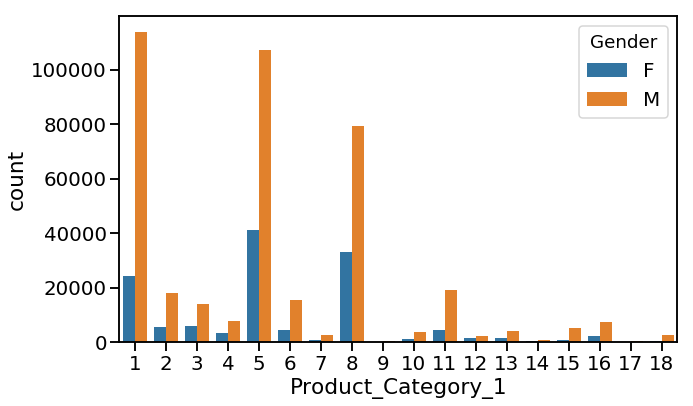

In [255]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=dataset, x='Product_Category_1', hue='Gender')

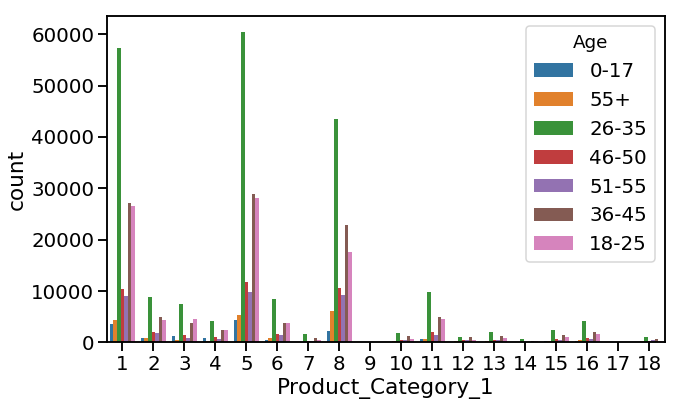

In [294]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=dataset, x='Product_Category_1', hue='Age')

In [277]:
productos_mas_comprados= dataset[(dataset.Product_Category_1 ==1)
                                 |(dataset.Product_Category_1 ==5)
                                 |(dataset.Product_Category_1 ==8)]

# OR: |
#AND: & (Misma sintaxis que OR)

In [278]:
print(productos_mas_comprados)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
1       1000001  P00248942      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
5       1000003  P00193542      M  26-35          15             A   
6       1000004  P00184942      M  46-50           7             B   
7       1000004  P00346142      M  46-50           7             B   
8       1000004   P0097242      M  46-50           7             B   
9       1000005  P00274942      M  26-35          20             A   
10      1000005  P00251242      M  26-35          20             A   
11      1000005  P00014542      M  26-35          20             A   
12      1000005  P00031342      M  26-35          20             A   
13      1000005  P00145042      M  26-35          20             A   
14      1000006  P00231342      F  51-55           9             A   
17      1000006  P00058442      F  51-55           9             A   
18      1000007  P00

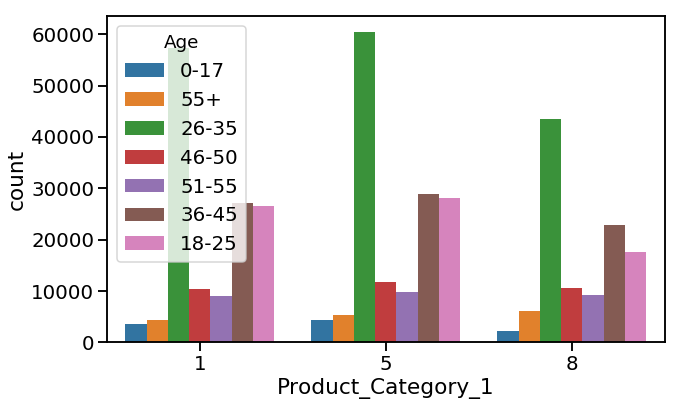

In [279]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=productos_mas_comprados, x='Product_Category_1', hue='Age')

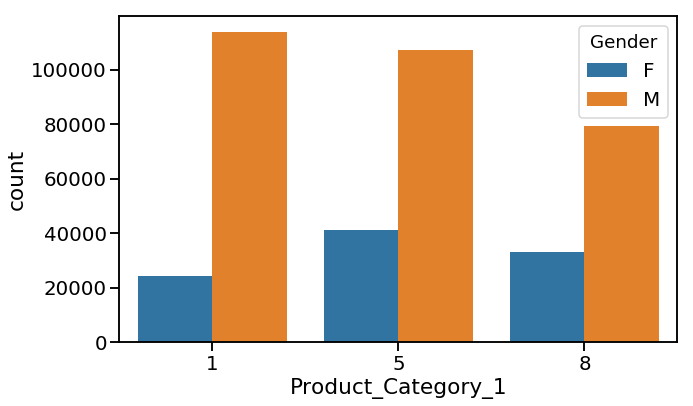

In [298]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=productos_mas_comprados, x='Product_Category_1', hue='Gender')

In [299]:
productos_menos_comprados= dataset[(dataset.Product_Category_1 !=1)
                                 &(dataset.Product_Category_1 !=5)
                                 &(dataset.Product_Category_1 !=8)]

# != : not equal.
# AND: &.

In [300]:
print(productos_menos_comprados)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
15      1000006  P00190242      F  51-55           9             A   
16      1000006   P0096642      F  51-55           9             A   
25      1000009  P00135742      M  26-35          17             C   
29      1000010  P00085942      F  36-45           1             B   
33      1000010  P00058342      F  36-45           1             B   
36      1000010  P00182642      F  36-45           1             B   
40      1000010  P00087242      F  36-45           1             B   
43      1000010   P0094542      F  36-45           1             B   
44      1000010  P00148642      F  36-45           1             B   
71      1000018  P00190742      F  18-25           3             B   
72      1000018  P00

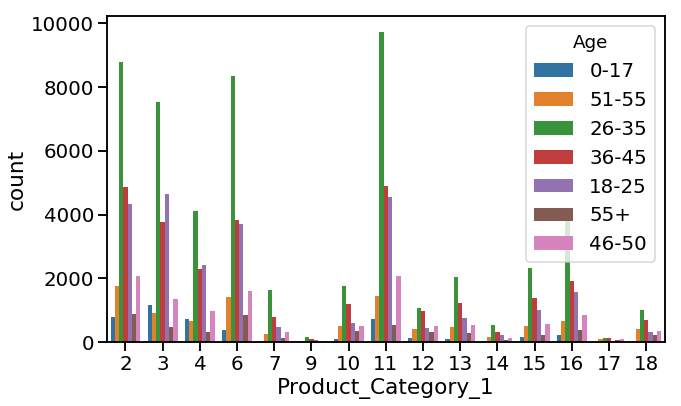

In [301]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=productos_menos_comprados, x='Product_Category_1', hue='Age')

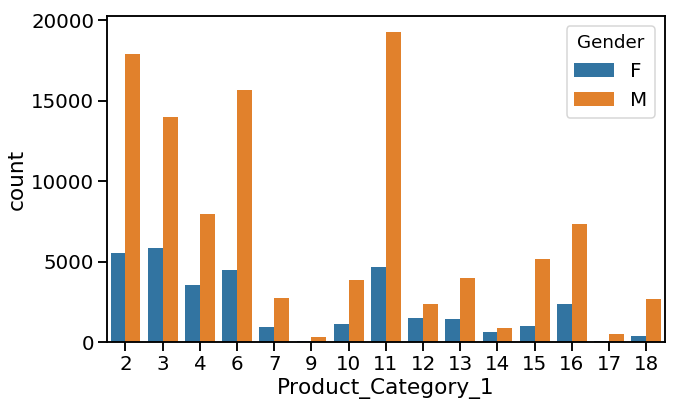

In [302]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=productos_menos_comprados, x='Product_Category_1', hue='Gender')

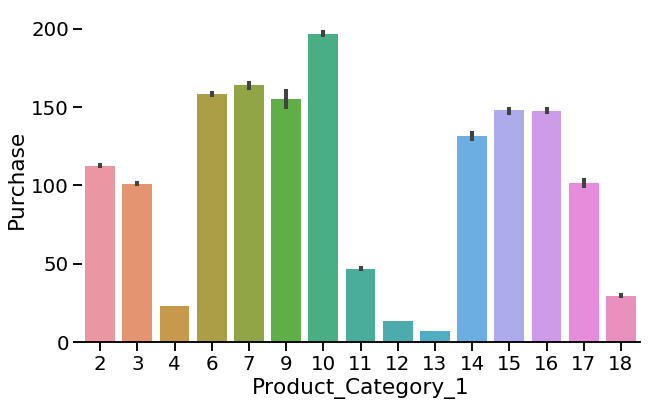

In [304]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=productos_menos_comprados, x='Product_Category_1', y='Purchase')
seaborn.despine(left=True)

In [350]:
compras_por_usuario = dataset.groupby('User_ID').size().reset_index()
compras_por_usuario.rename(columns={0:'Cantidad_de_compras'}, inplace=True)

print(compras_por_usuario)


      User_ID  Cantidad_de_compras
0     1000001                   34
1     1000002                   76
2     1000003                   29
3     1000004                   13
4     1000005                  106
5     1000006                   46
6     1000007                   16
7     1000008                   76
8     1000009                   57
9     1000010                  222
10    1000011                   69
11    1000012                   11
12    1000013                   60
13    1000014                   13
14    1000015                  116
15    1000016                   21
16    1000017                  114
17    1000018                  179
18    1000019                  144
19    1000020                   12
20    1000021                   13
21    1000022                  155
22    1000023                  171
23    1000024                   76
24    1000025                   43
25    1000026                  226
26    1000027                   41
27    1000028       

In [358]:
usuarios_compradores= compras_por_usuario[compras_por_usuario.Cantidad_de_compras > 200]

print(usuarios_compradores)

      User_ID  Cantidad_de_compras
9     1000010                  222
25    1000026                  226
32    1000033                  215
45    1000048                  337
50    1000053                  377
55    1000058                  260
59    1000062                  281
89    1000092                  223
113   1000117                  282
119   1000123                  352
132   1000136                  227
142   1000146                  238
144   1000148                  338
145   1000149                  333
147   1000151                  283
153   1000157                  217
159   1000163                  271
162   1000166                  216
165   1000169                  312
169   1000173                  314
183   1000187                  243
188   1000192                  284
191   1000195                  466
194   1000198                  207
195   1000199                  206
198   1000202                  379
200   1000204                  246
212   1000216       

In [368]:
usuarios_compradores_dataset = pandas.merge(usuarios_compradores, 
                                            dataset[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']], 
                                            how='left', 
                                            on='User_ID')

usuarios_compradores_dataset_depurado = usuarios_compradores_dataset.drop_duplicates('User_ID')

usuarios_compradores_dataset_depurado

,User_ID,Cantidad_de_compras,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000010,222,F,36-45,1,B,4+,1
222,1000026,226,M,26-35,7,B,2,1
448,1000033,215,M,46-50,3,A,1,1
663,1000048,337,M,26-35,4,B,3,1
1000,1000053,377,M,26-35,0,B,1,0
1377,1000058,260,M,26-35,2,B,3,0
1637,1000062,281,F,36-45,3,A,1,0
1918,1000092,223,F,18-25,4,B,1,0
2141,1000117,282,M,26-35,17,A,2,1
2423,1000123,352,M,36-45,9,B,4+,1


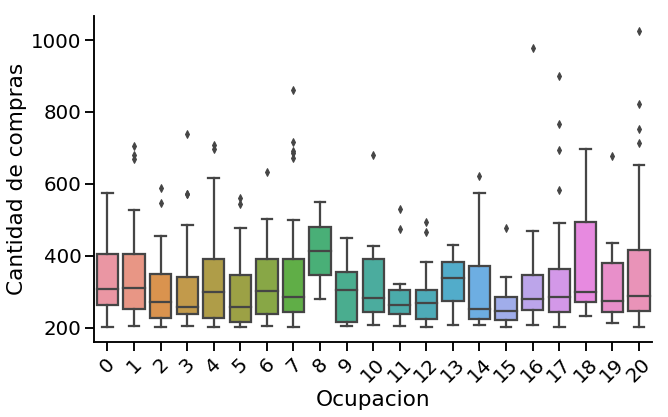

In [371]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data= usuarios_compradores_dataset_depurado,
                x= 'Occupation',
                y= 'Cantidad_de_compras')

plt.ylabel('Cantidad de compras')
plt.xlabel('Ocupacion')
plt.xticks(rotation=45)
seaborn.despine()

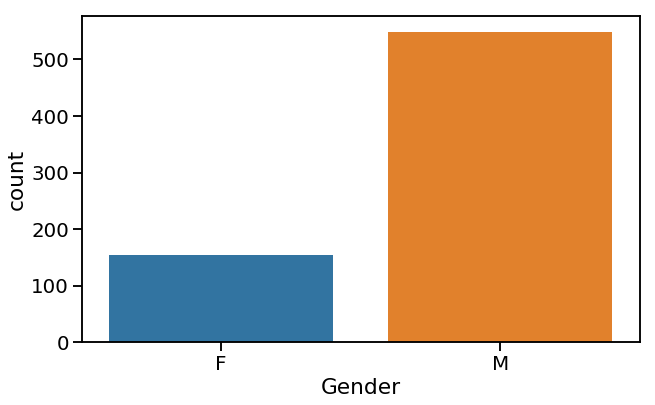

In [372]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=usuarios_compradores_dataset_depurado, x='Gender')

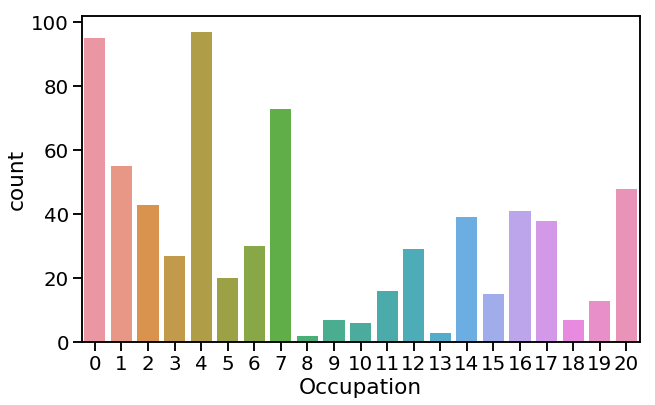

In [374]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=usuarios_compradores_dataset_depurado, x='Occupation')

#Un segmento interesante es la ocupacion 8. En cantidad de clientes son pocos pero en el box plot anterior destacan por la
#cantidad de compras. Es un segmento muy interesante para crecer.

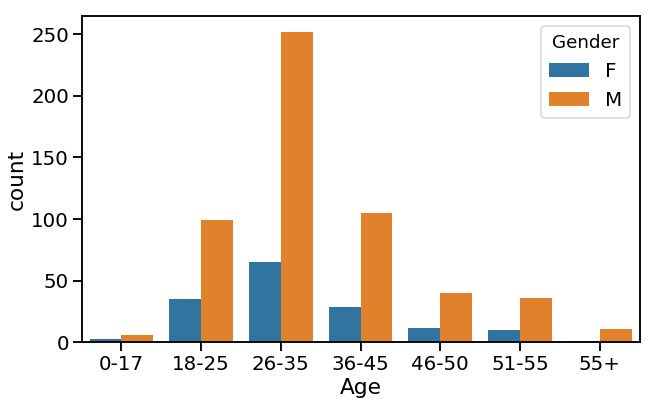

In [377]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=usuarios_compradores_dataset_depurado,
                  x='Age',
                  hue='Gender',
                  order=['0-17', '18-25', '26-35','36-45', '46-50', '51-55', '55+'])

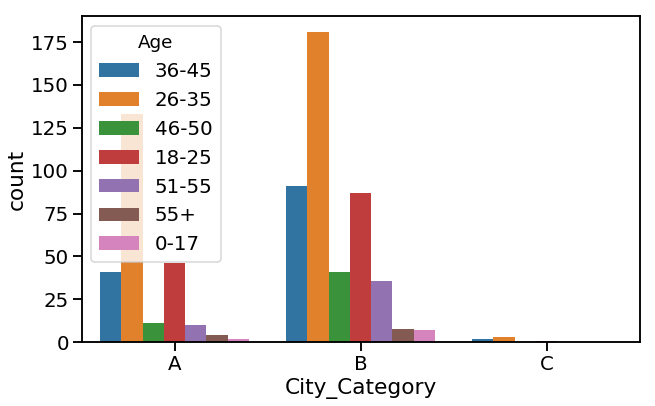

In [383]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=usuarios_compradores_dataset_depurado, 
                  x='City_Category'
                  order=['A', 'B', 'C'])

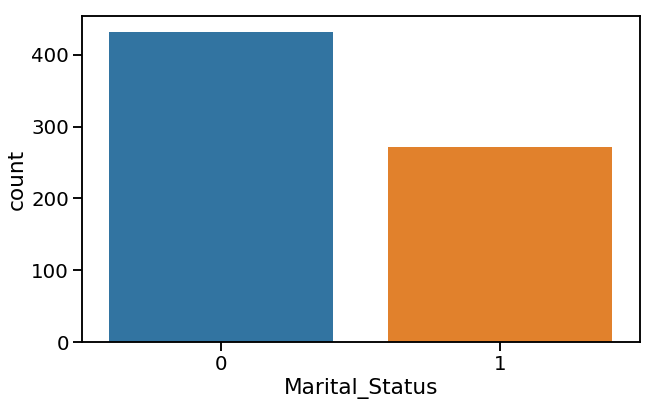

In [386]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=usuarios_compradores_dataset_depurado, 
                  x='Marital_Status')

In [404]:
## Analizamos la distribución de ventas por género

compras_por_usuario = dataset.groupby('User_ID').size().reset_index()
compras_por_usuario.rename(columns={0:'Cantidad_comprada'}, inplace=True)

intermedia = pandas.merge (compras_por_usuario,
                           dataset[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']], 
                           how = 'left', 
                           on = 'User_ID')
intermedia = intermedia.drop_duplicates('User_ID')

compra_hombres = intermedia[intermedia['Gender'] == 'M']
compra_mujeres = intermedia[intermedia['Gender'] == 'F']


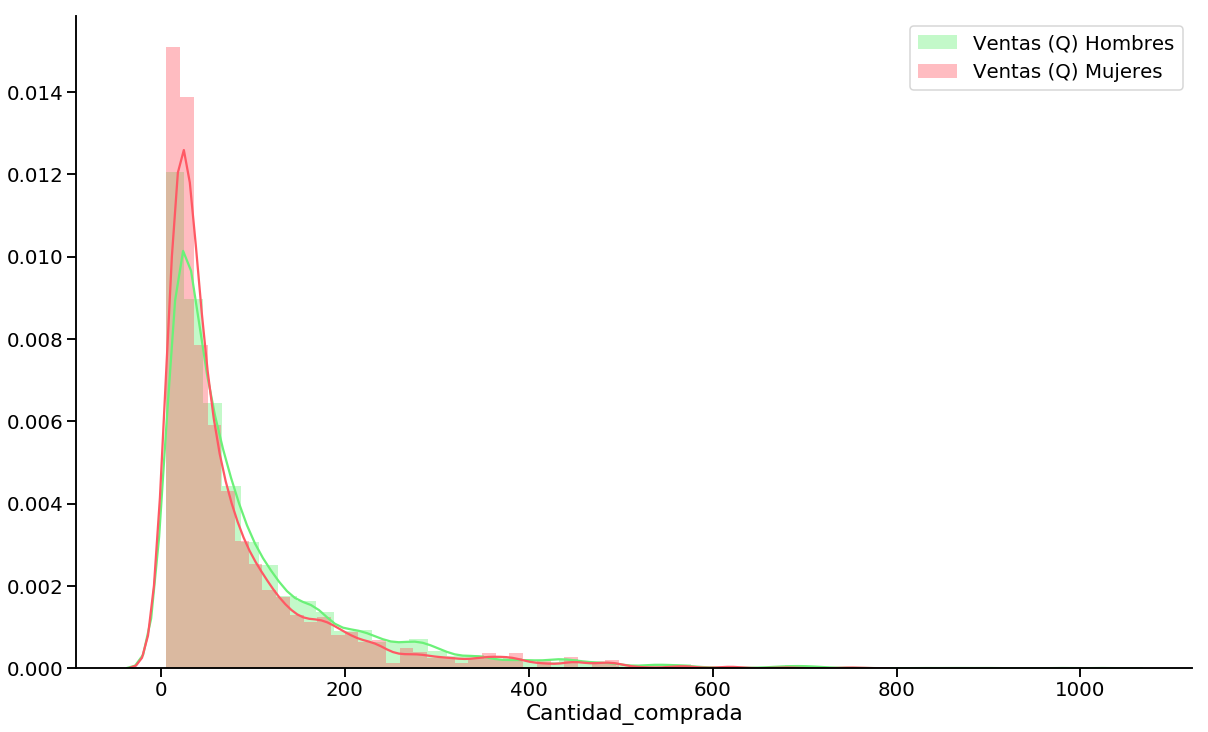

In [405]:
plt.figure(figsize=(20,12))
seaborn.distplot(compra_hombres['Cantidad_comprada'], color=GREEN, label='Ventas (Q) Hombres')
seaborn.distplot(compra_mujeres['Cantidad_comprada'], color=RED, label='Ventas (Q) Mujeres')
plt.legend()
seaborn.despine()

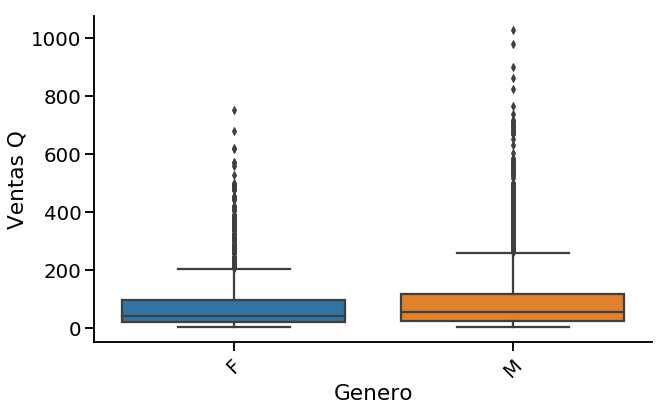

In [406]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data= intermedia,
                x= 'Gender',
                y= 'Cantidad_comprada')

plt.ylabel('Ventas Q')
plt.xlabel('Genero')
plt.xticks(rotation=45)
seaborn.despine()

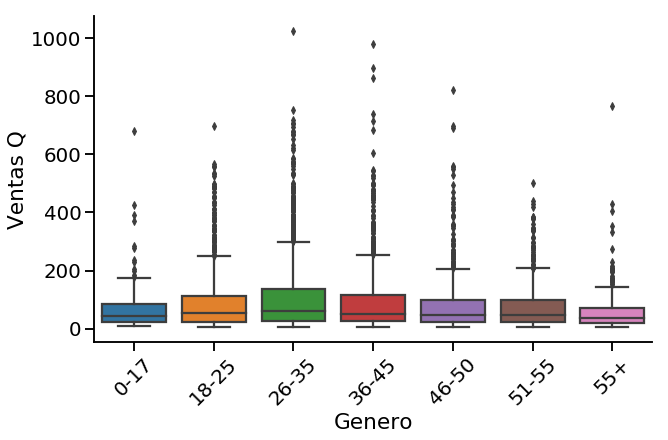

In [414]:
## Analizamos la distribución de ventas por edad

plt.figure(figsize=(10,6))
seaborn.boxplot(data= intermedia,
                x= 'Age',
                y= 'Cantidad_comprada',
                order=['0-17', '18-25', '26-35','36-45', '46-50', '51-55', '55+'])

plt.ylabel('Ventas Q')
plt.xlabel('Genero')
plt.xticks(rotation=45)
seaborn.despine()

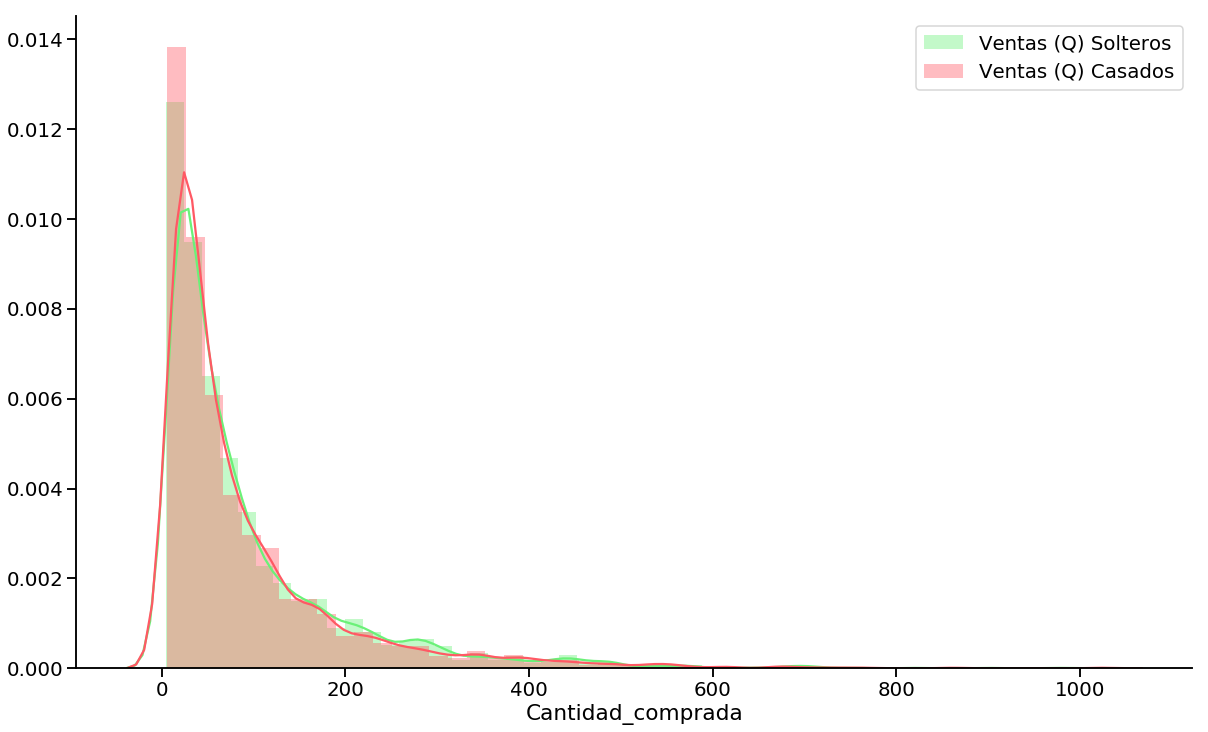

In [420]:
## Analizamos la distribución de ventas por estado civil

compras_solteros = intermedia[intermedia['Marital_Status'] == 0]
compras_casados = intermedia[intermedia['Marital_Status'] == 1]

plt.figure(figsize=(20,12))
seaborn.distplot(compras_solteros['Cantidad_comprada'], color=GREEN, label='Ventas (Q) Solteros')
seaborn.distplot(compras_casados['Cantidad_comprada'], color=RED, label='Ventas (Q) Casados')
plt.legend()
seaborn.despine()

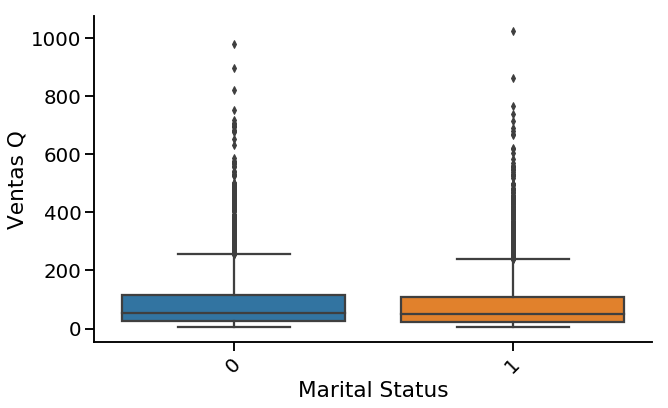

In [421]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data= intermedia,
                x= 'Marital_Status',
                y= 'Cantidad_comprada')

plt.ylabel('Ventas Q')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
seaborn.despine()

In [430]:
compras = dataset.groupby('City_Category').size().reset_index()
compras.rename(columns={0:'Cantidad vendida'}, inplace=True)

usuarios = dataset.groupby('User_ID').size().reset_index()

usuarios_dataset = pandas.merge(usuarios,dataset, how = 'left', on = 'User_ID')
usuarios_dataset = usuarios_dataset.drop_duplicates('User_ID')


cantidad = usuarios_dataset.groupby('City_Category').size().reset_index()
cantidad.rename(columns={0:'Cantidad de compradores'}, inplace=True)


final = pandas.merge(compras,cantidad, how ='left', on= 'City_Category')

final['Cant. prom. comprada por usuario'] = final['Cantidad vendida'] / final['Cantidad de compradores']

cantidad_usuarios = cantidad['Cantidad de compradores'].sum()
ventas_totales = dataset['User_ID'].count()

final['% compradores'] = final['Cantidad de compradores'] / cantidad_usuarios
final['% ventas'] = final['Cantidad vendida'] / ventas_totales
final

,City_Category,Cantidad vendida,Cantidad de compradores,Cant. prom. comprada por usuario,% compradores,% ventas
0,A,144638,1045,138.409569,0.177389,0.269055
1,B,226493,1707,132.684827,0.289764,0.421322
2,C,166446,3139,53.025167,0.532847,0.309623


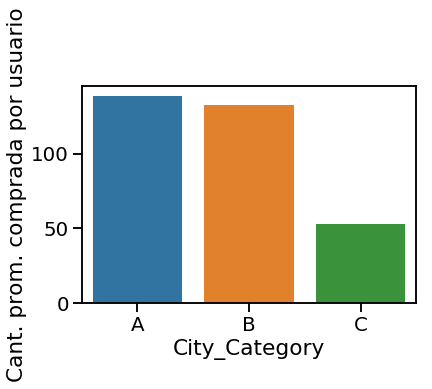

In [432]:
seaborn.barplot(data=final, x='City_Category', y='Cant. prom. comprada por usuario')

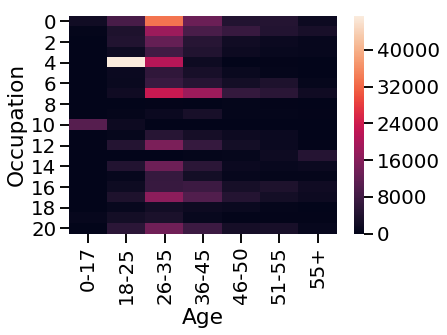

In [434]:
exp = dataset[['Occupation', 'Age']]
exp = exp.pivot_table(index='Occupation', columns= 'Age', aggfunc=len, fill_value=0)
seaborn.heatmap(exp)

#Para que un heatmap no nos lleve a conclusiones erróneas, la cantidad de personas en cada intervalo de edad deberia ser similar.
#¿Hay tantas de estas combinaciones porque siempre ocurren juntas, o sólo porque son los elementos más frecuentes?